In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
df = pd.read_csv("mobile_sales_data.csv")

In [4]:
df.shape

(30000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  30000 non-null  object
 1   Brand                    30000 non-null  object
 2   Product Code             30000 non-null  object
 3   Price                    30000 non-null  int64 
 4   Discount (%)             30000 non-null  int64 
 5   Inward Date              30000 non-null  object
 6   Dispatch Date            30000 non-null  object
 7   Quantity Sold            30000 non-null  int64 
 8   Customer Name            30000 non-null  object
 9   Customer Location        30000 non-null  object
 10  Region                   30000 non-null  object
 11  Processor Specification  30000 non-null  object
 12  Total Revenue            30000 non-null  int64 
 13  RAM (GB)                 30000 non-null  int64 
 14  ROM (GB)                 30000 non-nul

In [29]:
# converting Inward Date and Dispatch Date from object to datetime
df["Inward Date"] = pd.to_datetime(df["Inward Date"])
df["Dispatch Date"] = pd.to_datetime(df["Dispatch Date"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product                  30000 non-null  object        
 1   Brand                    30000 non-null  object        
 2   Product Code             30000 non-null  object        
 3   Price                    30000 non-null  int64         
 4   Discount (%)             30000 non-null  int64         
 5   Inward Date              30000 non-null  datetime64[ns]
 6   Dispatch Date            30000 non-null  datetime64[ns]
 7   Quantity Sold            30000 non-null  int64         
 8   Customer Name            30000 non-null  object        
 9   Customer Location        30000 non-null  object        
 10  Region                   30000 non-null  object        
 11  Processor Specification  30000 non-null  object        
 12  Total Revenue            30000 n

In [9]:
df.head()

Product     Brand Product Code   Price  Discount (%) Inward Date  \
0  Mobile Phone  Motorola     88EB4558   78570            27  2023-08-02   
1  Mobile Phone   Samsung     9F975B08  159826             7  2025-03-19   
2  Mobile Phone      Dell     14932CAE   11670            25  2023-10-10   
3  Mobile Phone  Motorola     E3CF42BE  174698             6  2025-02-09   
4  Mobile Phone     Apple     F54013D6   51251            11  2023-04-03   

  Dispatch Date  Quantity Sold       Customer Name Customer Location   Region  \
0    2023-08-03              6        William Hess      South Kelsey  Central   
1    2025-03-20              5       Leah Copeland        South Todd  Central   
2    2023-10-16              6     Nicole Gonzalez      South Miguel    North   
3    2025-03-20             10     Miranda Clayton      North Deanna    North   
4    2023-04-19              9  Ms. Katie Anderson   Lake Laurenfort    North   

  Processor Specification  Total Revenue  RAM (GB)  ROM (GB)  
0        Snapdragon 7 Gen         471420        12       128  
1      MediaTek Dimensity         799130         8       256  
2          Apple A-Series          70020        16       256  
3      MediaTek Dimensity        1746980         6        64  
4        Snapdragon 8 Gen         461259         4       256

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the data

In [ ]:
q1 = df["Price"].quantile(0.25)
q1

np.float64(53397.0)

In [ ]:
q3 = df["Price"].quantile(0.75)
q3

np.float64(151255.0)

In [ ]:
iqr = q3-q1
iqr

np.float64(97858.0)

In [ ]:
outliers = df[(df["Price"] < (q1-1.5*iqr)) | (df["Price"] > (q3 + 1.5*iqr))]

In [ ]:
outliers

Empty DataFrame
Columns: [Product, Brand, Product Code, Price, Discount (%), Inward Date, Dispatch Date, Quantity Sold, Customer Name, Customer Location, Region, Processor Specification, Total Revenue, RAM (GB), ROM (GB)]
Index: []

In [ ]:
px.box(df["Price"])

In [ ]:
px.box(df["Discount (%)"])

In [31]:
px.box(df["Total Revenue"])

There are ouliers in Total Revenue Column

In [32]:
q1 = df["Total Revenue"].quantile(0.25)
q3 = df["Total Revenue"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["Total Revenue"] < lower_bound) | (df["Total Revenue"] > upper_bound)]

In [33]:
outliers

Product      Brand Product Code   Price  Discount (%) Inward Date  \
115    Mobile Phone     Realme     F4600CB1  190965            14  2024-05-04   
182    Mobile Phone     Realme     32F63FBA  197284            17  2024-04-05   
205    Mobile Phone     Realme     F98CF399  187255            14  2023-09-25   
242    Mobile Phone   Motorola     C7511C5C  199125            23  2023-06-27   
370    Mobile Phone         HP     7FE89074  195690            27  2024-03-10   
...             ...        ...          ...     ...           ...         ...   
29238        Laptop       Dell     69708B03  183338            22  2023-05-14   
29272        Laptop  Microsoft     2DDA1117  185707            30  2023-09-18   
29613  Mobile Phone       Dell     43711933  194832             8  2025-03-02   
29690        Laptop  Microsoft     7E79FF98  198288             7  2024-04-26   
29751        Laptop    Toshiba     BC26443A  183359            11  2023-11-03   

      Dispatch Date  Quantity Sold     Customer Name   Customer Location  \
115      2024-06-17             10     Linda Kennedy          Josephland   
182      2024-06-02             10       Alex Tucker     West Katiemouth   
205      2023-10-28             10  Matthew Martinez       New Daisyberg   
242      2023-08-21             10       Lisa Arnold           Port Todd   
370      2024-03-11             10    Tyler Martinez          Nortonfurt   
...             ...            ...               ...                 ...   
29238    2023-06-04             10    Christy Brandt          Harperfurt   
29272    2023-11-11             10      Shawn Wright          Perezmouth   
29613    2025-03-26             10       Daniel Soto           Port Ryan   
29690    2024-05-07             10      Barbara Hunt       Lake Samantha   
29751    2023-12-03             10      James Larsen  Lake Stephaniebury   

        Region Processor Specification  Total Revenue  RAM (GB)  ROM (GB)  
115       West          Apple A-Series        1909650         6        64  
182    Central          MediaTek Helio        1972840         6       128  
205       West          MediaTek Helio        1872550        12       256  
242       West           Snapdragon 7s        1991250         6       256  
370    Central          Apple A-Series        1956900         8        64  
...        ...                     ...            ...       ...       ...  
29238     West                 Ryzen 5        1833380         6        64  
29272    South                      i9        1857070         8       128  
29613    South      MediaTek Dimensity        1948320        16       512  
29690  Central                 Ryzen 9        1982880         4       512  
29751     West                 Ryzen 3        1833590        32       128  

[275 rows x 15 columns]

In [34]:
df["Total Revenue"] = df["Total Revenue"].clip(lower=lower_bound, upper=upper_bound)

In [35]:
px.box(df["Total Revenue"])

In [ ]:
df["Total Revenue"] = np.where(df["Total Revenue"] > upper_bound, upper_bound, np.where(df["Total Revenue"] < lower_bound, lower_bound, df["Total Revenue"]))

In [14]:
px.box(df["RAM (GB)"])

There are outliersin RAM column

In [15]:
q1 = df["RAM (GB)"].quantile(0.25)
q3 = df["RAM (GB)"].quantile(0.75)

In [16]:
iqr = q3-q1

In [17]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [18]:
out = df[(df["RAM (GB)"] < lower_bound) | (df["RAM (GB)"] > upper_bound)]

In [19]:
out

Product    Brand Product Code   Price  Discount (%) Inward Date  \
14     Mobile Phone     Dell     BDAB9D30  104292            30  2023-10-28   
15     Mobile Phone  Samsung     B51BE37A   27749            21  2025-03-06   
18     Mobile Phone    Nokia     A957726E   97802            14  2023-07-13   
21     Mobile Phone   Realme     98660CB1   67598            26  2024-03-21   
29     Mobile Phone   Realme     FFAFAD2B   23100            23  2023-07-05   
...             ...      ...          ...     ...           ...         ...   
29972        Laptop       HP     B3623FF9   89704             9  2024-07-30   
29976  Mobile Phone     Acer     C64F867C   60843            17  2024-04-08   
29984  Mobile Phone     iQOO     31862428  149619            27  2025-02-04   
29988        Laptop   Huawei     E3680A1D   31795            15  2024-02-02   
29990        Laptop   Google     A5C7C5B9   99168             6  2023-09-09   

      Dispatch Date  Quantity Sold       Customer Name   Customer Location  \
14       2023-11-30              8       Gary Williams         Mitchellton   
15       2025-03-30              6         Nicole Wood            Ruiztown   
18       2023-08-25              7         Joel Turner        Craigborough   
21       2024-05-11              7       Gregory Jones      East Scottport   
29       2023-08-21              9  Michelle Gallagher       West Jesseton   
...             ...            ...                 ...                 ...   
29972    2024-09-25              7       Lisa Crawford          Austinfurt   
29976    2024-05-18              2      Caleb Thompson         Santiagoton   
29984    2025-04-01              5          Jamie Wood        Madisonmouth   
29988    2024-03-15              1        Kayla Powell       Butlerborough   
29990    2023-10-27              8       Andrew Malone  West Christineview   

        Region Processor Specification  Total Revenue  RAM (GB)  ROM (GB)  
14       North        Snapdragon 8 Gen       834336.0        32       512  
15        West        Snapdragon 8 Gen       166494.0        32        64  
18       South        Snapdragon 7 Gen       684614.0        32       128  
21       North          Apple A-Series       473186.0        32       256  
29       North          MediaTek Helio       207900.0        32       128  
...        ...                     ...            ...       ...       ...  
29972  Central                 Ryzen 5       627928.0        32       128  
29976     East          Samsung Exynos       121686.0        32       512  
29984    South        Snapdragon 8 Gen       748095.0        32       512  
29988  Central                 Ryzen 9        31795.0        32       128  
29990  Central                 Ryzen 9       793344.0        32        64  

[4989 rows x 15 columns]

In [20]:
df["RAM (GB)"] = df["RAM (GB)"].clip(lower=lower_bound, upper=upper_bound)

In [21]:
px.box(df["RAM (GB)"])

In [ ]:
px.box(df["ROM (GB)"])

In [36]:
x = df["Quantity Sold"]
y = df.groupby("Product")

In [37]:
y = df.groupby("Product")["Quantity Sold"]
y1 = y.get_group("Mobile Phone").sum()
y1

np.int64(137670)

In [38]:
y2 = y.get_group("Laptop").sum()
y2

np.int64(27699)

In [39]:
z = [y1, y2]

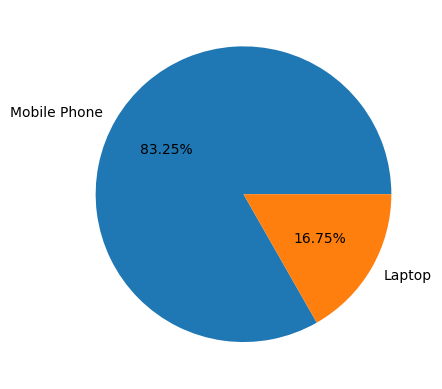

In [ ]:
plt.pie(z, labels = df["Product"].unique(), autopct = "%0.2f%%")
plt.show()

In [41]:
dic = {'Cental':4977, 'East':4898, 'North':4991, 'South':5018, 'west':5099}

In [42]:
values = dic.values()

In [43]:
keys = dic.keys()

In [44]:
df.groupby(["Region", "Product"])["Quantity Sold"].count()

Region   Product     
Central  Laptop           949
         Mobile Phone    4977
East     Laptop           973
         Mobile Phone    4898
North    Laptop          1003
         Mobile Phone    4991
South    Laptop          1015
         Mobile Phone    5018
West     Laptop          1077
         Mobile Phone    5099
Name: Quantity Sold, dtype: int64

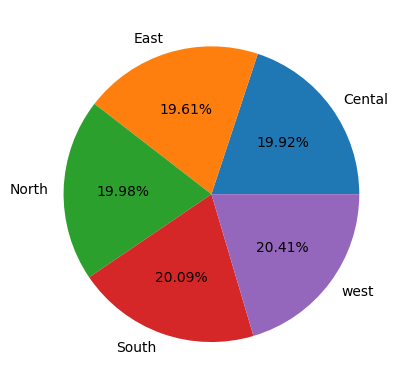

In [45]:
# mobile phones
plt.pie(values, labels = keys, autopct = "%0.2f%%")
plt.show()

In [46]:
dic2 = {'Cental':949, 'East':973, 'North':1003, 'South':1015, 'west':1077}

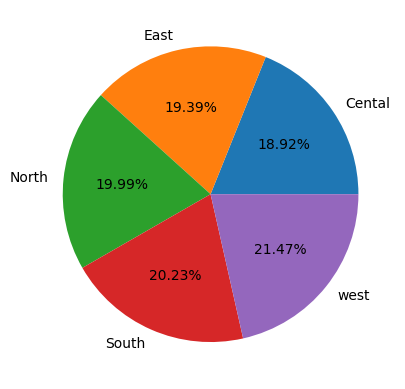

In [47]:
# Laptops
plt.pie(dic2.values(), labels = dic2.keys(), autopct = "%0.2f%%")
plt.show()

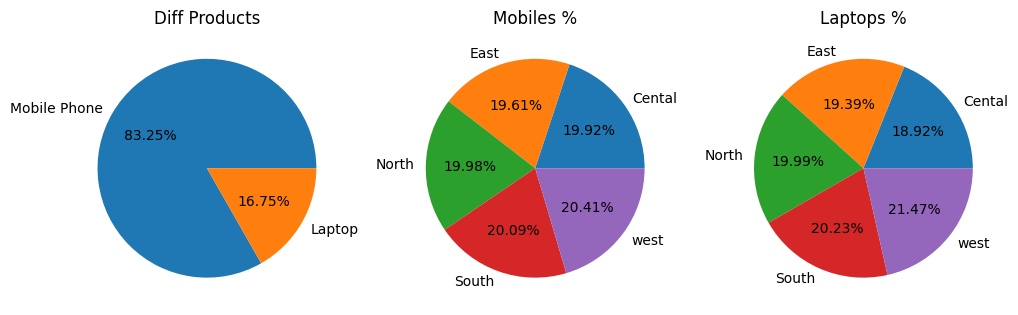

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Diff Products")
plt.pie(z, labels = df["Product"].unique(), autopct = "%0.2f%%")

plt.subplot(1,3,2)
plt.title("Mobiles %")
plt.pie(values, labels = keys, autopct = "%0.2f%%")

plt.subplot(1,3,3)
plt.title("Laptops %")
plt.pie(dic2.values(), labels = dic2.keys(), autopct = "%0.2f%%")

plt.show()
plt.tight_layout()

In [ ]:
df["Brand"].unique()

array(['Motorola', 'Samsung', 'Dell', 'Apple', 'Toshiba', 'Realme', 'HP',
       'Google', 'Acer', 'iQOO', 'Lenovo', 'Nokia', 'Asus', 'Vivo',
       'Redmi', 'Oppo', 'Huawei', 'Sony', 'OnePlus', 'Microsoft'],
      dtype=object)

# **Problem Statement:**  To analyze and estimate product sales (in terms of quantity sold) across different regions and identify the key factors that contribute to the dominance of certain brands in specific regions.

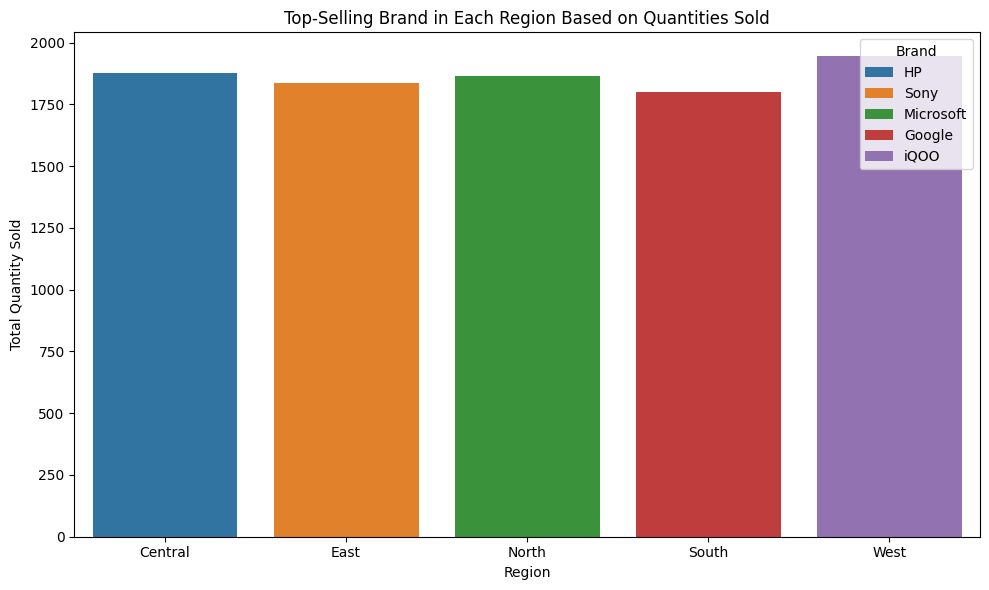

In [ ]:
grp = df.groupby(["Region", "Brand"])["Quantity Sold"].sum().reset_index()
top = grp.loc[grp.groupby('Region')["Quantity Sold"].idxmax()]

# Plot
plt.figure(figsize = (10,6))
sns.barplot(top, x = "Region", y = "Quantity Sold", hue = "Brand", dodge = False)
plt.title("Top-Selling Brand in Each Region Based on Quantities Sold")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Region")
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

In [ ]:
grp = df.groupby(['Region', 'Brand'])['Quantity Sold'].sum().reset_index()
grp.loc[grp.groupby('Region')['Quantity Sold'].idxmax()]

Region      Brand  Quantity Sold
5   Central         HP           1878
36     East       Sony           1838
48    North  Microsoft           1866
64    South     Google           1798
99     West       iQOO           1944

In [49]:
pivot_dis = pd.pivot_table(df, values = "Discount (%)", index = "Region", columns = "Brand", aggfunc = 'mean', fill_value = 0)
pivot_dis

Brand         Acer      Apple       Asus       Dell     Google         HP  \
Region                                                                      
Central  17.204473  16.970199  17.243636  17.778878  17.574394  17.676923   
East     17.832740  17.166667  17.274834  17.128405  17.244147  16.737201   
North    17.026316  17.208075  17.459649  17.579310  17.752475  17.600719   
South    17.607717  18.535256  17.464646  17.685430  17.462236  17.533101   
West     17.388704  17.576052  17.655405  17.322259  17.526316  16.496732   

Brand       Huawei     Lenovo  Microsoft   Motorola      Nokia    OnePlus  \
Region                                                                      
Central  17.582192  17.625468  17.550336  17.079872  18.081433  17.457627   
East     17.642384  17.239344  16.849057  17.513699  17.219269  16.919753   
North    17.330247  17.279365  17.896657  16.727273  17.582524  17.671186   
South    17.353312  17.934169  18.563140  17.369963  17.713781  17.383333   
West     16.919192  17.000000  17.731034  17.456250  17.030960  17.143813   

Brand         Oppo     Realme      Redmi    Samsung       Sony    Toshiba  \
Region                                                                      
Central  17.260135  17.439597  17.369231  16.845361  17.426282  17.744828   
East     16.815603  17.805369  17.580000  17.769231  17.669782  17.230000   
North    17.548611  17.277027  17.032362  17.553571  16.760797  17.273026   
South    18.171875  16.382353  17.825623  17.043344  17.374570  17.035256   
West     17.095541  17.916667  17.830409  17.562092  18.030100  17.134557   

Brand         Vivo       iQOO  
Region                         
Central  17.466899  17.578275  
East     17.715867  17.724382  
North    17.035831  17.479554  
South    17.638978  17.466216  
West     18.042763  17.278932

In [54]:
# Discount
central_row = pivot_dis.loc["Central"]
central_sorted = central_row.sort_values(ascending=False).head()

east_row = pivot_dis.loc["East"]
east_sorted = east_row.sort_values(ascending = False).head()

North_row = pivot_dis.loc["North"]
North_sorted = North_row.sort_values(ascending = False).head()

south_row = pivot_dis.loc["South"]
south_sorted = south_row.sort_values(ascending = False).head()

west_row = pivot_dis.loc["West"]
west_sorted = west_row.sort_values(ascending = False).head()

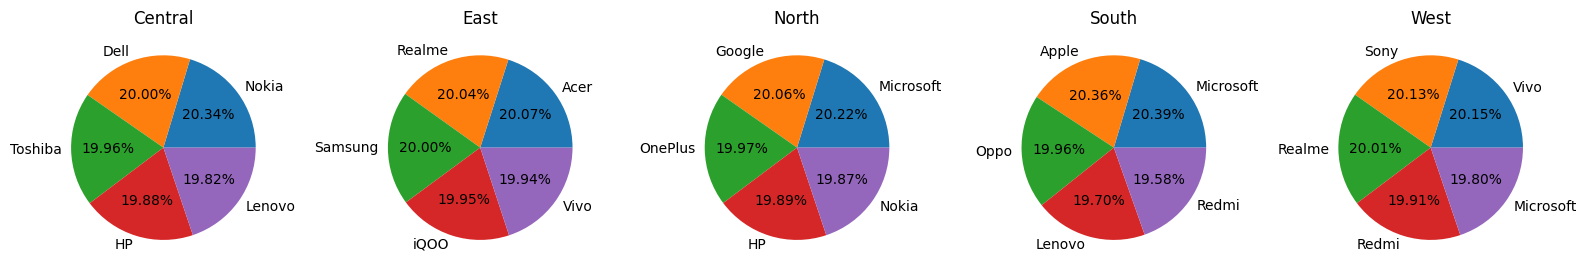

In [55]:
# Discount
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
central_sorted.plot.pie(autopct='%0.2f%%')
plt.title('Central')
plt.ylabel('')

plt.subplot(1,5,2)
east_sorted.plot.pie(autopct = "%0.2f%%")
plt.title('East')
plt.ylabel('')

plt.subplot(1,5,3)
North_sorted.plot.pie(autopct = "%0.2f%%")
plt.title('North')
plt.ylabel('')

plt.subplot(1,5,4)
south_sorted.plot.pie(autopct = "%0.2f%%")
plt.title('South')
plt.ylabel('')

plt.subplot(1,5,5)
west_sorted.plot.pie(autopct = "%0.2f%%")
plt.title('West')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [50]:
pivot_price = pd.pivot_table(df, values = "Price", index = "Region", columns = "Brand", aggfunc = 'mean', fill_value = 0)
pivot_price

Brand             Acer          Apple           Asus           Dell  \
Region                                                                
Central  103056.230032  103718.701987  102880.552727  106649.287129   
East     102507.032028  102167.029630  106725.764901  101117.680934   
North    102107.766447  101738.195652  104351.385965  102366.782759   
South    110781.842444  104284.483974   98238.565657  103451.033113   
West      97031.033223  104565.621359  102326.138514  100151.132890   

Brand           Google             HP         Huawei         Lenovo  \
Region                                                                
Central   99098.702422  100493.329231  106184.297945  100848.985019   
East     108145.842809  103384.430034   98728.900662   99542.209836   
North    105444.544554  100985.687050   98893.851852  101201.657143   
South    103169.123867   97385.324042   98176.908517  103436.332288   
West     101539.820433  105633.901961  101451.919192  106529.947712   

Brand        Microsoft       Motorola          Nokia        OnePlus  \
Region                                                                
Central  103838.815436   98921.993610  104121.934853  103986.128814   
East     104714.015094  105489.921233  101025.212625   98943.722222   
North    102354.732523  103489.293706  105578.980583  101935.823729   
South    104573.627986  103651.945055  101996.084806  101414.340000   
West     107226.413793  101269.378125  105653.278638  101813.468227   

Brand             Oppo         Realme          Redmi        Samsung  \
Region                                                                
Central  104991.577703  104708.026846  102929.450000  104021.570447   
East     100246.315603   99946.651007   99879.700000  104195.467692   
North    100135.215278   97553.385135   99318.200647  106123.042857   
South     98132.487500   97608.889706  100823.441281  102204.708978   
West     101431.484076  101701.000000  101402.871345  103466.790850   

Brand             Sony        Toshiba           Vivo           iQOO  
Region                                                               
Central  108492.512821  104940.458621  100351.498258  100660.095847  
East     101542.115265  104354.613333  102107.298893  105484.367491  
North    101805.275748  108322.371711   97589.661238  100984.888476  
South    100436.546392  108487.605769  101215.325879  101754.172297  
West     104177.578595  101759.629969   97793.197368  105504.189911

In [ ]:
# Price
cp = pivot_price.loc["Central"]
cs = cp.sort_values(ascending = True).head()

ep = pivot_price.loc["East"]
es = ep.sort_values(ascending = True).head()

np = pivot_price.loc["North"]
ns = np.sort_values(ascending = True).head()

sp = pivot_price.loc["South"]
ss = sp.sort_values(ascending = True).head()

wp= pivot_price.loc["West"]
ws = wp.sort_values(ascending = True).head()

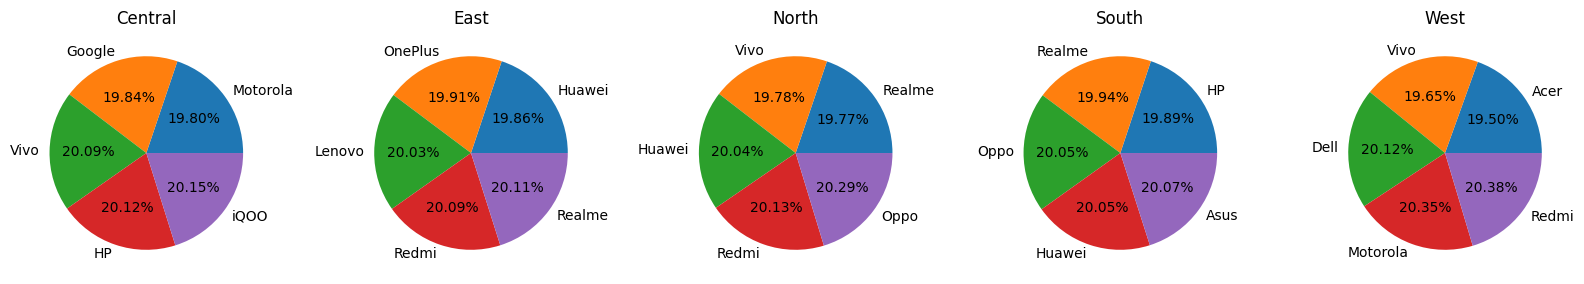

In [ ]:
# Price
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
cs.plot.pie(autopct='%0.2f%%')
plt.title('Central')
plt.ylabel('')

plt.subplot(1,5,2)
es.plot.pie(autopct = "%0.2f%%")
plt.title('East')
plt.ylabel('')

plt.subplot(1,5,3)
ns.plot.pie(autopct = "%0.2f%%")
plt.title('North')
plt.ylabel('')

plt.subplot(1,5,4)
ss.plot.pie(autopct = "%0.2f%%")
plt.title('South')
plt.ylabel('')

plt.subplot(1,5,5)
ws.plot.pie(autopct = "%0.2f%%")
plt.title('West')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [51]:
pivot_rev = pd.pivot_table(df, values = "Total Revenue", index = "Region", columns = "Brand", aggfunc = 'mean', fill_value = 0)
pivot_rev

Brand             Acer          Apple           Asus           Dell  \
Region                                                                
Central  545250.022364  572191.414735  562732.723636  603352.832508   
East     619006.828292  582453.095370  581209.225166  554372.792802   
North    576087.117599  563521.079193  574665.062281  556394.905172   
South    583630.138264  570914.547276  518946.980640  579963.735927   
West     512630.303987  581682.588997  548628.543074  563760.657807   

Brand           Google             HP         Huawei         Lenovo  \
Region                                                                
Central  564933.783737  585553.606923  621230.661815  581421.156367   
East     631276.861204  582958.358362  546044.962748  571688.717213   
North    563875.017327  539321.921763  541226.912037  516912.800000   
South    550527.141239  493471.462544  510750.874606  539773.281348   
West     589222.424923  583992.242647  565878.031987  560014.400327   

Brand        Microsoft       Motorola          Nokia        OnePlus  \
Region                                                                
Central  586359.092282  543407.721246  562583.295603  613287.249153   
East     584957.781132  580124.861301  572116.848837  519241.209877   
North    584919.694529  584239.511364  569396.990291  556802.616102   
South    594956.499147  584418.105311  547153.481449  551294.814167   
West     602659.962931  539210.733594  581815.291796  540663.320234   

Brand             Oppo         Realme          Redmi        Samsung  \
Region                                                                
Central  561548.107264  601052.884228  556973.329808  535295.666667   
East     535592.792553  582795.547819  537620.851667  568148.159231   
North    535626.282118  547975.129223  528776.083333  569732.838393   
South    516586.482031  534444.013787  582064.102313  534056.570433   
West     534507.865446  572240.224638  536008.613304  590931.911765   

Brand             Sony        Toshiba           Vivo           iQOO  
Region                                                               
Central  612271.832532  583429.288793  549234.113240  542128.622204  
East     576719.593458  560460.940000  591761.949262  552759.075972  
North    556507.434385  577448.490954  538086.446254  569266.592937  
South    565739.654639  598784.141026  559545.043131  555092.066723  
West     545870.798495  553622.609327  497688.080592  605465.744807

In [ ]:
# Total Revenue
cp = pivot_rev.loc["Central"]
cs = cp.sort_values(ascending = False).head()

ep = pivot_rev.loc["East"]
es = ep.sort_values(ascending = False).head()

np = pivot_rev.loc["North"]
ns = np.sort_values(ascending = False).head()

sp = pivot_rev.loc["South"]
ss = sp.sort_values(ascending = False).head()

wp= pivot_rev.loc["West"]
ws = wp.sort_values(ascending = False).head()

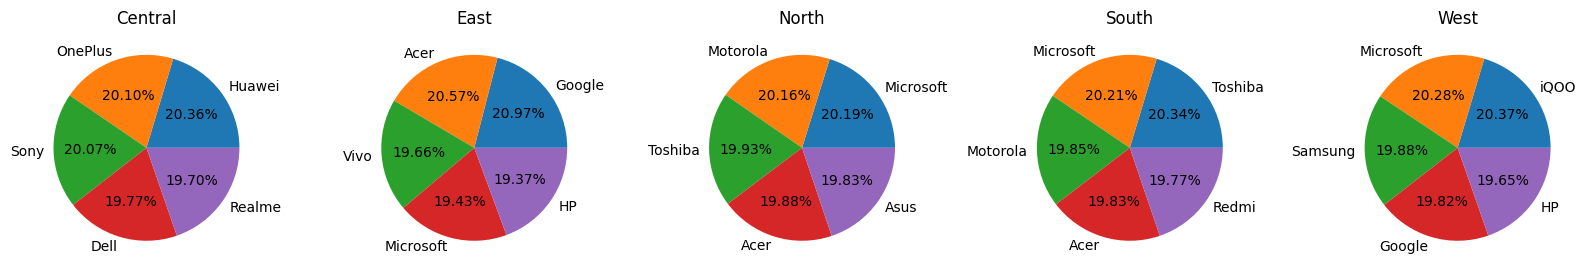

In [ ]:
# Total Revenue
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
cs.plot.pie(autopct='%0.2f%%')
plt.title('Central')
plt.ylabel('')

plt.subplot(1,5,2)
es.plot.pie(autopct = "%0.2f%%")
plt.title('East')
plt.ylabel('')

plt.subplot(1,5,3)
ns.plot.pie(autopct = "%0.2f%%")
plt.title('North')
plt.ylabel('')

plt.subplot(1,5,4)
ss.plot.pie(autopct = "%0.2f%%")
plt.title('South')
plt.ylabel('')

plt.subplot(1,5,5)
ws.plot.pie(autopct = "%0.2f%%")
plt.title('West')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [52]:
pivot_ram = pd.pivot_table(df, values = "RAM (GB)", index = "Region", columns = "Brand", aggfunc = 'mean', fill_value = 0)
pivot_ram

Brand         Acer      Apple       Asus       Dell     Google         HP  \
Region                                                                      
Central  13.207668  12.854305  13.636364  13.617162  13.017301  13.144615   
East     12.633452  12.659259  11.907285  13.392996  13.070234  13.699659   
North    13.059211  12.962733  13.298246  12.427586  14.184818  13.115108   
South    13.678457  12.833333  12.794613  12.980132  13.135952  14.097561   
West     13.455150  13.611650  12.918919  12.265781  12.916409  13.372549   

Brand       Huawei     Lenovo  Microsoft   Motorola      Nokia    OnePlus  \
Region                                                                      
Central  13.938356  12.906367  12.510067  11.891374  12.729642  13.627119   
East     13.205298  12.491803  12.988679  12.369863  12.405316  13.296296   
North    13.216049  13.269841  13.142857  13.314685  13.378641  12.983051   
South    12.466877  13.003135  13.276451  13.780220  12.049470  12.133333   
West     13.225589  13.457516  13.068966  11.706250  12.730650  12.735786   

Brand         Oppo     Realme      Redmi    Samsung       Sony    Toshiba  \
Region                                                                      
Central  12.574324  12.771812  13.884615  13.051546  12.237179  12.717241   
East     12.269504  13.275168  13.180000  13.550769  11.538941  13.026667   
North    12.479167  13.331081  13.061489  12.971429  12.551495  13.960526   
South    13.662500  12.536765  12.441281  13.009288  12.824742  12.641026   
West     12.789809  12.797101  12.690058  12.679739  13.652174  12.605505   

Brand         Vivo       iQOO  
Region                         
Central  13.177700  13.623003  
East     12.937269  12.706714  
North    13.205212  13.672862  
South    14.134185  12.918919  
West     12.546053  11.584570

In [ ]:
# RAM
cp = pivot_ram.loc["Central"]
cs = cp.sort_values(ascending = False).head()

ep = pivot_ram.loc["East"]
es = ep.sort_values(ascending = False).head()

np = pivot_ram.loc["North"]
ns = np.sort_values(ascending = False).head()

sp = pivot_ram.loc["South"]
ss = sp.sort_values(ascending = False).head()

wp= pivot_ram.loc["West"]
ws = wp.sort_values(ascending = False).head()

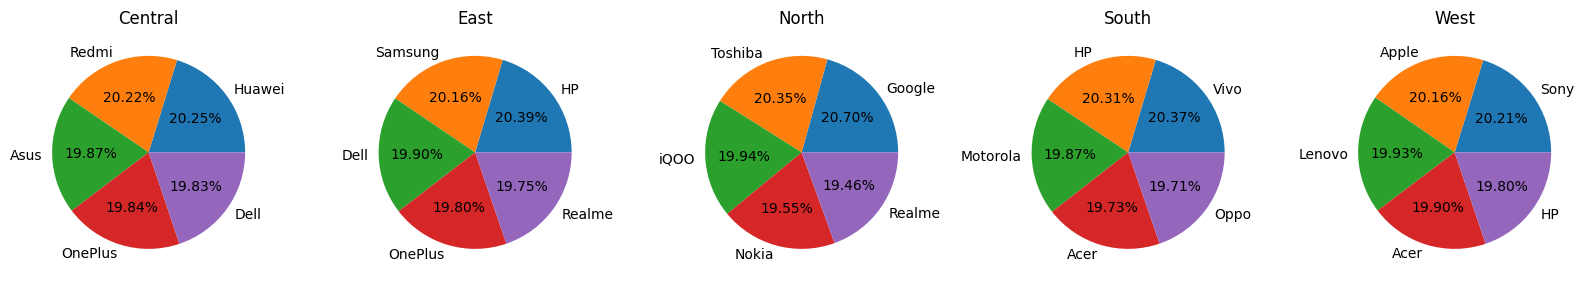

In [ ]:
# RAM
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
cs.plot.pie(autopct='%0.2f%%')
plt.title('Central')
plt.ylabel('')

plt.subplot(1,5,2)
es.plot.pie(autopct = "%0.2f%%")
plt.title('East')
plt.ylabel('')

plt.subplot(1,5,3)
ns.plot.pie(autopct = "%0.2f%%")
plt.title('North')
plt.ylabel('')

plt.subplot(1,5,4)
ss.plot.pie(autopct = "%0.2f%%")
plt.title('South')
plt.ylabel('')

plt.subplot(1,5,5)
ws.plot.pie(autopct = "%0.2f%%")
plt.title('West')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [53]:
pivot_rom = pd.pivot_table(df, values = "ROM (GB)", index = "Region", columns = "Brand", aggfunc = 'mean', fill_value = 0)
pivot_rom

Brand          Acer       Apple        Asus        Dell      Google  \
Region                                                                
Central  385.431310  422.357616  382.836364  392.448845  403.044983   
East     421.580071  414.814815  393.960265  412.638132  408.829431   
North    379.157895  391.552795  393.880702  387.089655  417.584158   
South    428.861736  384.000000  410.936027  414.304636  368.338369   
West     381.448505  421.695793  384.864865  403.561462  372.705882   

Brand            HP      Huawei      Lenovo   Microsoft    Motorola  \
Region                                                                
Central  390.301538  404.383562  384.958801  377.127517  399.948882   
East     419.604096  353.059603  419.462295  386.898113  363.835616   
North    416.230216  402.962963  413.663492  386.334347  370.349650   
South    385.337979  399.545741  394.633229  409.556314  386.813187   
West     421.647059  352.969697  423.111111  411.806897  414.800000   

Brand         Nokia     OnePlus        Oppo      Realme       Redmi  \
Region                                                                
Central  382.540717  424.569492  406.918919  406.120805  397.046154   
East     409.302326  386.567901  386.042553  440.053691  396.586667   
North    452.763754  416.542373  400.888889  392.648649  380.893204   
South    400.056537  402.986667  413.400000  383.058824  421.124555   
West     374.092879  368.374582  396.840764  393.043478  381.754386   

Brand       Samsung        Sony     Toshiba        Vivo        iQOO  
Region                                                               
Central  405.553265  372.717949  365.462069  338.731707  402.198083  
East     419.840000  371.040498  439.040000  403.365314  359.802120  
North    386.057143  399.096346  368.631579  386.293160  397.799257  
South    428.185759  405.553265  414.358974  395.450479  390.054054  
West     360.156863  411.397993  398.678899  380.421053  423.501484

In [ ]:
# ROM
cp = pivot_rom.loc["Central"]
cs = cp.sort_values(ascending = False).head()

ep = pivot_rom.loc["East"]
es = ep.sort_values(ascending = False).head()

np = pivot_rom.loc["North"]
ns = np.sort_values(ascending = False).head()

sp = pivot_rom.loc["South"]
ss = sp.sort_values(ascending = False).head()

wp= pivot_rom.loc["West"]
ws = wp.sort_values(ascending = False).head()

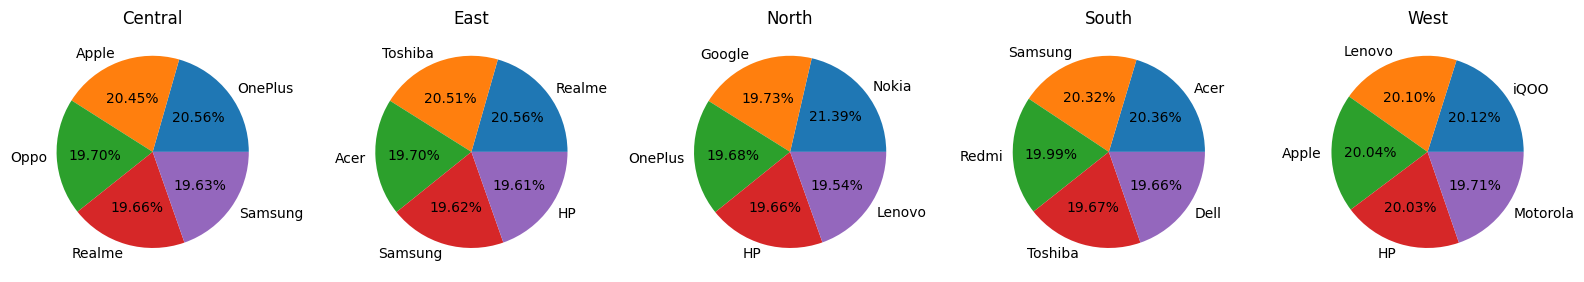

In [ ]:
# ROM
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
cs.plot.pie(autopct='%0.2f%%')
plt.title('Central')
plt.ylabel('')

plt.subplot(1,5,2)
es.plot.pie(autopct = "%0.2f%%")
plt.title('East')
plt.ylabel('')

plt.subplot(1,5,3)
ns.plot.pie(autopct = "%0.2f%%")
plt.title('North')
plt.ylabel('')

plt.subplot(1,5,4)
ss.plot.pie(autopct = "%0.2f%%")
plt.title('South')
plt.ylabel('')

plt.subplot(1,5,5)
ws.plot.pie(autopct = "%0.2f%%")
plt.title('West')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Observations:**  **HP brand** sales are **high** in **Central** region because of

- Average Price: ₹100,493 (lower than Dell/Apple)

- High RAM (13.1 GB) and ROM (390 GB)

- Balanced Discount (~17.7%)

Why HP? It's competitively priced with strong specs and decent discounts, making it a value pick over costlier brands like Dell and Apple.


**Sony Brand** sales are **high** in **East** region because of
- Even though RAM & ROM are less many prefer sony because of good pricing  

- Offers similar discounts as others (~17.6%)

- Slightly more affordable than Dell/HP in that region

Why Sony? Balanced performance and consistent pricing may have driven popularity.

**Microsoft brand** sales are **high** in **North** region because of
- huge **discounts**.
- high revenue because of microsoft

**Google Brand** sales are **high** in **South** region because of
- Well-priced (~₹103K), high RAM/ROM

Why Google? Tech-savvy regions may prefer Google’s brand appeal and specs, with competitive pricing.

**iQoo brand** sales are **high** in **West** region because of
- high revenue
- Top ROM (423 GB)

Why iQOO? Excellent storage offering and solid value in a price-sensitive region.

In [ ]:
x = df["Dispatch Date"] - df["Inward Date"]

0        1 days
1        1 days
2        6 days
3       39 days
4       16 days
          ...  
29995   40 days
29996    1 days
29997   49 days
29998   10 days
29999   58 days
Length: 30000, dtype: timedelta64[ns]

In [ ]:
df['Delay (Days)'] = (df['Dispatch Date'] - df['Inward Date']).dt.days

In [ ]:
pivot = pd.pivot_table(df,values='Delay (Days)',index='Region',columns='Brand',aggfunc='mean',fill_value=0)
pivot

Brand         Acer      Apple       Asus       Dell     Google         HP  \
Region                                                                      
Central  31.833866  30.046358  29.534545  31.412541  32.325260  30.621538   
East     29.110320  29.218519  31.423841  30.463035  29.755853  31.389078   
North    29.223684  29.611801  31.308772  29.806897  31.580858  31.190647   
South    33.112540  30.881410  30.343434  32.337748  31.063444  31.331010   
West     29.847176  30.631068  33.040541  29.365449  28.123839  30.271242   

Brand       Huawei     Lenovo  Microsoft   Motorola      Nokia    OnePlus  \
Region                                                                      
Central  30.195205  30.149813  30.201342  31.118211  28.641694  30.030508   
East     29.976821  29.937705  31.433962  31.226027  30.292359  29.734568   
North    29.762346  30.546032  30.586626  29.891608  31.508091  30.593220   
South    31.211356  31.128527  30.003413  30.124542  29.770318  30.326667   
West     31.545455  30.424837  29.358621  30.343750  32.102167  30.959866   

Brand         Oppo     Realme      Redmi    Samsung       Sony    Toshiba  \
Region                                                                      
Central  31.699324  30.067114  30.892308  30.103093  29.282051  29.865517   
East     29.673759  32.395973  31.486667  30.772308  30.869159  29.673333   
North    32.250000  29.500000  29.877023  32.742857  30.089701  29.476974   
South    30.350000  30.908088  31.722420  32.195046  30.378007  30.858974   
West     30.566879  32.061594  30.929825  30.888889  28.682274  31.626911   

Brand         Vivo       iQOO  
Region                         
Central  30.651568  30.607029  
East     32.431734  30.272085  
North    30.280130  31.620818  
South    30.127796  30.834459  
West     31.365132  30.237389

Observations: Here we can observe all the brands according to region were sold in 30 days

In [ ]:
px.box(df["Delay (Days)"])

In [ ]:
brand_region_revenue = df.groupby(["Region", "Brand"])["Total Revenue"].sum().reset_index()

fig = px.bar(brand_region_revenue, x="Brand", y="Total Revenue", color="Region",
             title="Total Revenue by Brand and Region", barmode="group")
fig.show()

In [ ]:
df["Brand"].value_counts()

Brand
Google       1545
Toshiba      1533
Huawei       1532
Samsung      1525
Sony         1524
Nokia        1523
Apple        1515
OnePlus      1513
Lenovo       1512
Acer         1510
Oppo         1500
iQOO         1498
Redmi        1492
HP           1489
Motorola     1484
Vivo         1482
Microsoft    1475
Asus         1455
Dell         1453
Realme       1440
Name: count, dtype: int64

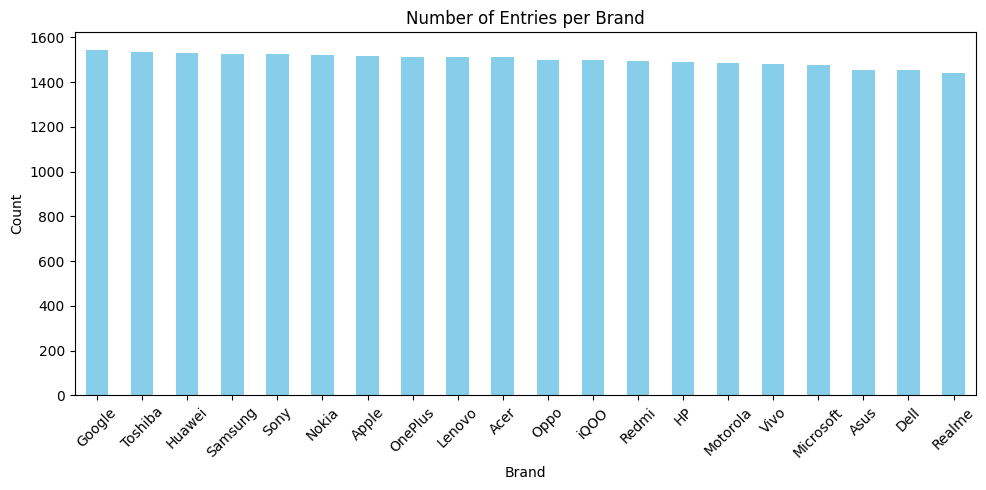

In [ ]:
# Count the number of entries for each brand
brand_counts = df['Brand'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 5))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Entries per Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
